<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Feature Imputation

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Feature Imputation**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Curse of Dimensionality, Dimensionality Reduction, Principal Component Analysis](https://youtu.be/embks9p4pb8?si=B2HXm_i0oMSWkBhN)
* [Multidimensional Scaling and Random Projection](https://youtu.be/Yt0o8ukIOKU?si=_ri1NPwKVdhYzgO3)
* [Feature Transformations](https://youtu.be/6QJjZoWknEI?si=p6vp811xWAmzWY3r)
* [Feature Selection](https://youtu.be/5Q0gemu-h3Q?si=ATG-ue0i2qcc-IVx)
* Feature Imputation - To Be Recorded Soon

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation for Feature Imputation

Most spatial, subsurface datasets are not complete, missing values from the database.

* many data analytics and machine learning workflows require complete data, $𝑥_(1,𝑖),\dots,𝑥_(𝑚,𝑖)$ for each of the data samples $𝑖 = 1,\ldots,𝑛$.

**Inferential Machine Learning** - methods the require complete data, for example, 

1. principal components analysis - require covariance matrix and covariance needs all feature values
2. multidimensional scaling - we cannot calculate the dissimilarity matrix without all features available
3. cluster analysis - we cannot calculate distances in feature space without all features values


**Predictive Machine Learning** - always require all features to train and test the model,

$$
y = f(X_1,\ldots,X_m)
$$

Dealing with missing data is an essential part of feature / data engineering, prerequisite for data analytics and machine learning. 

* it is important firstly to understand the cause and impact of the missing data.

#### Cause of Missing Feature Values

Missing at random (MAR) is not common and is difficult to evaluated, in this case,

* global random omission may not result in data bias and bias in the resulting models

MAR is not typically the case as missing data often is related to a confounding feature, for example,

* **sampling cost** - for example, low permeability test takes too long 

* **rock rheology or other sample survivorship biases** - for example, not possible to recover the mudstone samples
  
* **sample design** - sampling to reduce uncertainty and maximize profitability instead of statistical representativity, dual purpose samples for information and production

* **sampling accessibility** - there are locations in the subsurface that are difficult or impossible to samples, for example, near lakes or communities, or subsalt for seismic imaging

#### Consequences of Missing Feature Values

This will result in clustering of missing values over locations and feature space.

* omission of these feature values may bias global statistics, and degrade accuracy of local predictions

* the use of global distributions for imputing missing values may not be reasonable

More than reducing the amount of training and testing data, missing data, if not completely at random will result in:

* Biased sample statistics resulting in biased model training and testing

* Biased models with biased predictions with potentially no indication of the bias!

If you reread the above looking for solutions, I offer my Canadian, "I'm sorry". Those who know us know that we say sorry a lot and have a cool pronunciation of the word. 

I say all of the above as a cautionary note but,

* in some cases there are gaps in practice due to our data challenges, i.e., data paucity and nonstationarity.

* I could spend an entire course teaching methods to address these challenges

* the solutions integrate the entire subsurface, spatial project team, i.e., domain expertise is critical

* I'm going to leave this at the level of awareness

We must move beyond the commonly applied likewise deletion, removal of all samples with any missing features.

#### Load the Required Libraries

The following code loads the required libraries.

* These should have been installed with Anaconda 3.

In [1]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
from sklearn.impute import SimpleImputer                      # basic imputation method
from sklearn.impute import KNNImputer                         # k-nearest neighbour imputation method
from sklearn.experimental import enable_iterative_imputer     # required for MICE imputation
from sklearn.impute import IterativeImputer                   # MICE imputation
import os                                                     # set working directory, run executables
import math                                                   # basic math operations
import random                                                 # for random numbers
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from matplotlib.colors import ListedColormap                  # custom color maps
import matplotlib.ticker as mtick                             # control tick label formatting
import seaborn as sns                                         # for matrix scatter plots
from scipy import stats                                       # summary statistics
import numpy.linalg as linalg                                 # for linear algebra
import scipy.spatial as sp                                    # for fast nearest neighbor search
import scipy.signal as signal                                 # kernel for moving window calculation
from numba import jit                                         # for numerical speed up
from statsmodels.stats.weightstats import DescrStatsW
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 73071                                                  # random seed
np.random.seed(seed=seed)

#### Declare Functions

Here's a function to assist with the plots:

* **add_grid** - convenience function to add major and minor gridlines to improve plot interpretability

Here is the function:

In [2]:
def add_grid():                                               # add major and minor gridlines
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [3]:
#os.chdir("c:/PGE383")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

##### Dataset 0, Unconventional Multivariate v4

Let's load the provided multivariate, dataset [unconv_MV.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV_v4.csv). This dataset has variables from 1,000 unconventional wells including:

* well average porosity
* log transform of permeability (to linearize the relationships with other variables)
* acoustic impedance (kg/m^3 x m/s x 10^6)
* brittleness ratio (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial production 90 day average (MCFPD).

##### Dataset 1, Twelve, 12

Let's load the provided multivariate, 2D spatial dataset [12_sample_data.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/12_sample_data.csv). This dataset has variables from 480 unconventional wells including:

* X (m), Y (m) location coordinates
* porosity (%) after units conversion
* permeability (mD)
* acoustic impedance (kg/m^3 x m/s x 10^6)

##### Dataset 2, Reservoir 21

Let's load the provided multivariate, 3D spatial dataset [res21_wells.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/res21_wells.csv). This dataset has variables from 73 vertical wells over a 10,000m x 10,000m x 50 m reservoir unit:

* well (ID)
* X (m), Y (m), Depth (m) location coordinates
* Porosity (%) after units conversion
* Permeability (mD)
* Acoustic Impedance (kg/m2s*10^6) after units conversion
* Facies (categorical) - ordinal with ordering from Shale, Sandy Shale, Shaley Sand, to Sandstone.
* Density (g/cm^3)
* Compressible velocity (m/s)
* Youngs modulus (GPa)
* Shear velocity (m/s)
* Shear modulus (GPa)

We load the tabular data with the pandas 'read_csv' function into a DataFrame we called 'my_data' and then preview it to make sure it loaded correctly.

* we also populate lists with data ranges and labels for ease of plotting

In [26]:
idata = 1

if idata == 0:
    df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv') # load data from Dr. Pyrcz's GitHub repository  
    df.drop('Prod',axis=1,inplace=True)

    features = df.columns.values.tolist()                          # store the names of the features
    
    xmin = [6.0,0.0,1.0,10.0,0.0,0.9]; xmax = [24.0,10.0,5.0,85.0,2.2,2.9] # set the minimum and maximum values for plotting

    flabel = ['Porosity (%)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Brittleness Ratio (%)', # set the names for plotting
             'Total Organic Carbon (%)','Vitrinite Reflectance (%)']

    ftitle = ['Porosity','Permeability','Acoustic Impedance','Brittleness Ratio', # set the units for plotting
             'Total Organic Carbon','Vitrinite Reflectance']

elif idata == 1:
    names = {'Porosity':'Por'}
    
    df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv') # load data from Dr. Pyrcz's GitHub repository  
    df = df.rename(columns=names)
    df['Por'] = df['Por'] * 100.0; df['AI'] = df['AI'] / 1000.0; 
    df.drop('Unnamed: 0',axis=1,inplace=True) 
    
    features = df.columns.values.tolist()                          # store the names of the features

    xmin = [0.0,0.0,0.0,4.0,0.0,6.5,1.4,1600.0,10.0,1300.0,1.6]; xmax = [10000.0,10000.0,1.0,19.0,500.0,8.3,3.6,6200.0,50.0,2000.0,12.0] # set the minimum and maximum values for plotting
    
    flabel = ['Well (ID)','X (m)','Y (m)','Depth (m)','Porosity (fraction)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Facies (categorical)',
              'Density (g/cm^3)','Compressible velocity (m/s)','Youngs modulus (GPa)', 'Shear velocity (m/s)', 'Shear modulus (GPa)'] # set the names for plotting

    ftitle = ['Well','X','Y','Depth','Porosity','Permeability','Acoustic Impedance','Facies',
              'Density','Compressible velocity','Youngs modulus', 'Shear velocity', 'Shear modulus']

elif idata == 2:  
    df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/res21_2D_wells.csv') # load data from Dr. Pyrcz's GitHub repository  
    
    features = df.columns.values.tolist()                          # store the names of the features

    xmin = [1,0.0,0.0,4.0,0.0,6.5,1.4,1600.0,10.0,1300.0,1.6]; xmax = [73,10000.0,10000.0,19.0,500.0,8.3,3.6,6200.0,50.0,2000.0,12.0] # set the minimum and maximum values for plotting
    
    flabel = ['Well (ID)','X (m)','Y (m)','Depth (m)','Porosity (fraction)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Facies (categorical)',
              'Density (g/cm^3)','Compressible velocity (m/s)','Youngs modulus (GPa)', 'Shear velocity (m/s)', 'Shear modulus (GPa)'] # set the names for plotting

    ftitle = ['Well','X','Y','Depth','Porosity','Permeability','Acoustic Impedance','Facies',
              'Density','Compressible velocity','Youngs modulus', 'Shear velocity', 'Shear modulus']

* We can also establish the feature ranges for plotting. We could calculate the feature range directly from the data with code like this:

```p
Pormin = np.min(df['Por'].values)                             # extract ndarray of data table column
Pormax = np.max(df['Por'].values)                             # and calculate min and max
```

but, this would not result in easy to understand color bars and axis scales, let's pick convenient round numbers. We will also declare feature labels for ease of plotting. 

#### Visualize the DataFrame

Visualizing the DataFrame is useful first check of the data.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

* add parameter 'n=13' to see the first 13 rows of the dataset.   

In [27]:
df.head(n=13)                                                 # DataFrame preview

,X,Y,Facies,Por,Perm,AI
0,502.929859,9008.972357,1,22.076146,140.021266,3.413064
1,508.696361,8505.744515,1,23.715447,39.837129,3.074563
2,503.892888,8003.429847,1,23.435152,84.992437,2.292783
3,508.230145,7509.751406,1,24.455309,90.632307,2.494849
4,500.611637,7000.684230,1,23.178662,811.547979,2.522064
5,506.402291,6508.472882,1,23.327956,426.992456,3.964186
6,507.369440,5502.400577,1,23.442340,2398.406492,3.318886
7,501.912508,5009.004277,1,21.965671,1637.224971,3.030874
8,505.307673,4503.042048,1,20.038883,265.636019,3.454389
9,507.287139,3507.277503,0,16.590753,7.951511,5.025286


Note, the first dataset idata = 0, is exhaustic without missing data, if you selected that one, let's remove some data for the demonstrations below.

#### Remove Some Data 

Let's select a proportion of NaN values, values to set as missing,

```python
proportion_NaN = 0.1
```
Then we can make a boolean array 

1. make an ndarray of same shape (number rows and columns) as the DataFrame of uniform[0,1] distributed values

```python
np.random.random(df.shape)
```

2. check condition of less than the identified proportion to make a boolean ndarray of same size, true if less than the proportion. The result will be the correct proportion (within error) of random true values.

```python
remove = np.random.random(df.shape) < proportion_NaN
```

3. apply the mask to remove the identified values from the DataFrame

```python
df_mask = df.mask(remove)
```

Full disclosure, for this demonstration our data is missing at random, MAR, and this simplifies our task. 

* this allows us to focus on the mechanics of feature imputation without the additional domain expertise topics. This is a good first step!

In [28]:
if idata == 0 or idata == 1:
    proportion_NaN = 0.1                                          # proportion of values in DataFrame to remove
    np.random.seed(seed=seed)                                     # ensure repeatability
    remove = np.random.random(df.shape) < proportion_NaN          # make the boolean array for removal
    if idata == 1:
        remove[:,df.columns.get_loc('Facies')] = False            # avoid categoical imputation at this time          
    print('Fraction of removed values in mask ndarray = ' + str(round(remove.sum()/remove.size,3)) + '.')

    df_mask = df.mask(remove)
else:
    df_mask = df.copy(deep = True)

print('Fraction of nan values in the DataFrame = ' + str(round(df_mask.isnull().sum().sum()/(df_mask.shape[0]*df_mask.shape[1]),3)) + '.')

Fraction of removed values in mask ndarray = 0.076.
Fraction of nan values in the DataFrame = 0.076.


We now have a new DataFrame with some missing data.

* Let's do a .head() preview to observe the NaN values scattered throughout the dataset

In [29]:
df_mask.head(n=13)                                            # DataFrame preview

,X,Y,Facies,Por,Perm,AI
0,502.929859,9008.972357,1,22.076146,140.021266,3.413064
1,508.696361,8505.744515,1,23.715447,NaN,3.074563
2,503.892888,8003.429847,1,23.435152,84.992437,2.292783
3,508.230145,7509.751406,1,24.455309,90.632307,2.494849
4,500.611637,7000.684230,1,23.178662,811.547979,2.522064
5,506.402291,6508.472882,1,23.327956,426.992456,3.964186
6,507.369440,5502.400577,1,23.442340,2398.406492,3.318886
7,501.912508,5009.004277,1,NaN,1637.224971,3.030874
8,505.307673,4503.042048,1,20.038883,NaN,3.454389
9,507.287139,3507.277503,0,NaN,7.951511,NaN


#### Evaluation of the Data Coverage

Let's calculate the amount of missing data.

In [30]:
df_mask.describe().transpose()                                # DataFrame summary statistics

,count,mean,std,min,25%,50%,75%,max
X,441.0,4257.895977,2625.238412,3.291422,2008.013245,3804.098073,6009.596137,9804.934317
Y,441.0,5213.526395,2826.165910,191.894843,2792.724193,5390.333988,7591.061290,9995.745011
Facies,480.0,0.616667,0.486706,0.000000,0.000000,1.000000,1.000000,1.000000
Por,438.0,18.900896,3.146932,11.756196,16.574370,18.538435,21.507075,26.109068
Perm,433.0,536.754984,1260.408227,0.005776,6.954102,57.115903,400.298484,10319.904850
AI,428.0,3.757034,0.781976,1.746388,3.212900,3.697623,4.222997,6.194574


In [31]:
len(df_mask)

480

We can see the counts of available values for each feature, less than the total number of samples due to missing values. 

Let's make a plot to indicate data completeness for each feature

* this is a useful summarization

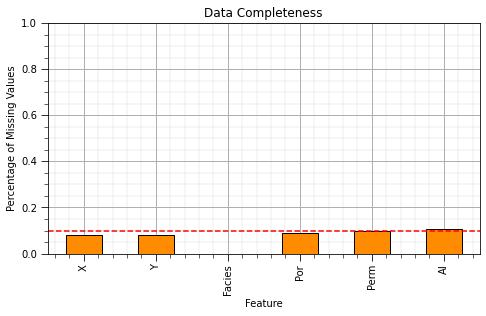

In [32]:
plt.subplot(111)                                              # data completeness plot
(df_mask.isnull().sum()/len(df)).plot(kind = 'bar',color='darkorange',edgecolor='black') 
plt.xlabel('Feature'); plt.ylabel('Percentage of Missing Values'); plt.title('Data Completeness'); plt.ylim([0.0,1.0])
plt.plot([-0.5,df.shape[1]+0.5],[0.1,0.1],color='red',ls='--')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0.2, hspace=0.2); add_grid(); plt.show()

This leads to the first data imputation method, feature selection. 

#### Imputation Method \#1 - Feature Selection

Data completeness should be considered in feature selection.

* if there is low data completeness, high percentage of missing samples, for a feature then the feature may be removed.

One method is to use the .drop() DataFrame function.

```python
df_test = df_mask.drop('VR',axis = 1)
```

We use axis = 1 to drop a feature (as above) to remove features with more than 10\% of feature values missing.

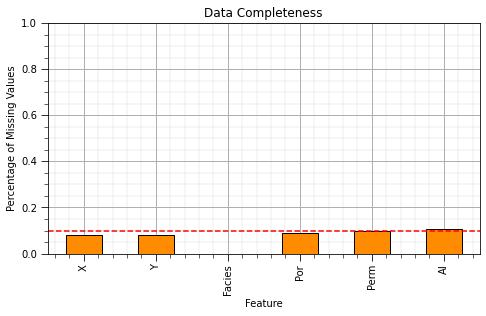

In [33]:
if idata == 0:
    drop_features = ['Perm','VR']
elif idata == 1:
    drop_features = []
elif idata == 2:
    drop_features = ['Youngs','Shear']

df_test = df_mask.drop(drop_features,axis = 1)

plt.subplot(111)
(df_test.isnull().sum()/len(df)).plot(kind = 'bar',color='darkorange',edgecolor='black')                # calculate DataFrame with percentage missing by feature
plt.xlabel('Feature'); plt.ylabel('Percentage of Missing Values'); plt.title('Data Completeness'); plt.ylim([0.0,1.0])
plt.plot([-0.5,df.shape[1]+0.5],[0.1,0.1],color='red',ls='--')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0.2, hspace=0.2); add_grid(); plt.show()

#### Imputation Method \#2 - Sample Selection

There may be samples with more missing feature values. 

* a specific vintage of data, for example, older data, or sample locations that experienced data collection problems

Let's check the coverage by sample in the DataFrame.

* we use the axis=1 parameter in the sum command to sum NaN values over the rows, samples, of the DataFrame.  

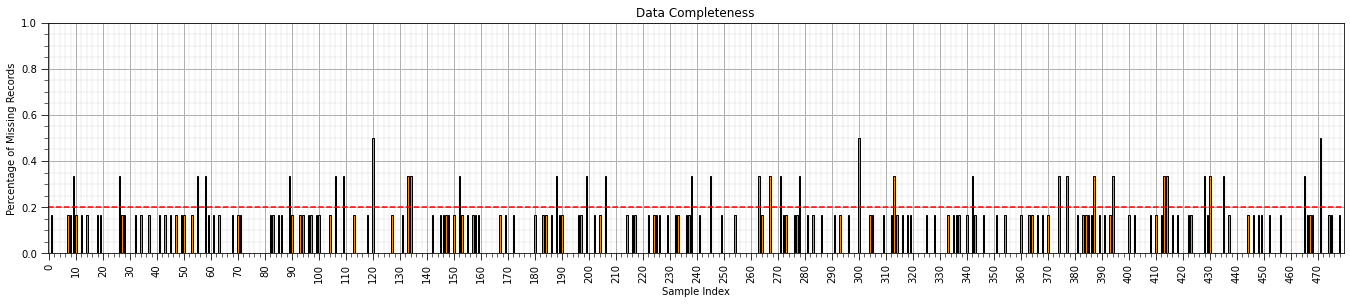

In [34]:
(df_mask.isnull().sum(axis=1)/len(df.columns)).plot(kind = 'bar',color='darkorange',edgecolor='black')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2) # plot formatting
plt.xlabel('Sample Index'); plt.ylabel('Percentage of Missing Records'); plt.title('Data Completeness')
plt.xticks(np.arange(0,len(df_mask),10),np.arange(0,len(df_mask),10))
plt.ylim([0,1.0])
plt.plot([-0.5,len(df)+0.5],[0.2,0.2],color='red',ls='--')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=0.8, wspace=0.2, hspace=0.2); add_grid(); plt.show()

If we identified samples with low data completeness, high percentage of missing samples, for a sample then the sample may be removed.

Once again we use the .drop() DataFrame function.

```python
df_test = df_mask.drop('Water',axis = 1)
```

This time we use axis = 0 to drop a list of samples and demonstrated below.

1. We need to make a list of the sample indices with too many missing samples

```python
(df_mask.isnull().sum(axis=1)/len(df.columns)) > max_proportion_missing_by_sample 
```

2. This is a tuple type, let's convert it to a ndarray then we ensure strip it to just the 1D values 

```python
index_low_coverage_samples = np.asarray(np.where(low_coverage_samples == True))[0]
```

3. Now we are ready to apply our boolean array of length number of samples with True for too many missing values to remove these samples by index.

```python
df_test2 = df_mask.drop(index = index_low_coverage_samples,axis = 0)
```

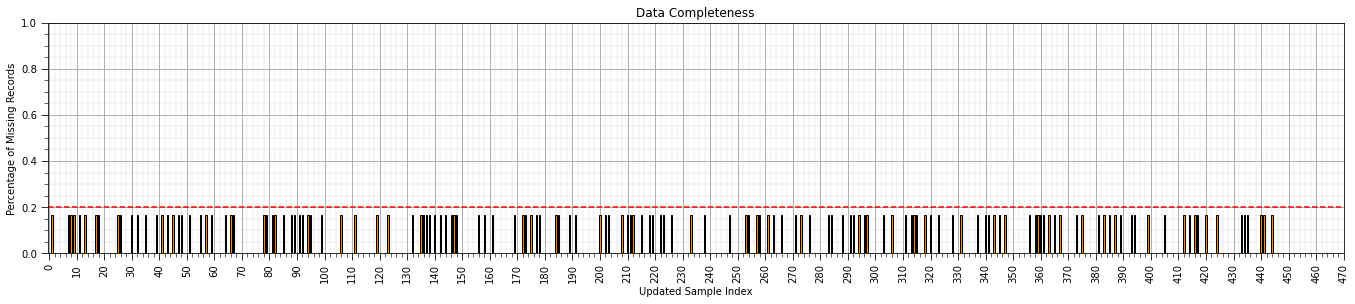

In [35]:
max_proportion_missing_by_sample = 0.2

low_coverage_samples = (df_mask.isnull().sum(axis=1)/len(df.columns)) > max_proportion_missing_by_sample 
index_low_coverage_samples = np.asarray(np.where(low_coverage_samples == True))[0]

df_test2 = df_mask.drop(index = index_low_coverage_samples,axis = 0)

(df_test2.isnull().sum(axis=1)/len(df_test2.columns)).plot(kind = 'bar',color='darkorange',edgecolor='black')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2) # plot formatting
plt.xlabel('Updated Sample Index'); plt.ylabel('Percentage of Missing Records'); plt.title('Data Completeness')
plt.xticks(np.arange(0,len(df_mask),10),np.arange(0,len(df_mask),10))
plt.ylim([0,1.0])
plt.plot([-0.5,len(df)+0.5],[0.2,0.2],color='red',ls='--')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=0.8, wspace=0.2, hspace=0.2); add_grid(); plt.show()

In [36]:
len(df_test2)

446

#### Imputation Method \#3 - Listwise Deletion

This is the method of removing all samples that have any missing feature values.

* this approach ensures complete data while technically avoiding the need for imputation

* no need for a imputation model decision 

* often removes important information

* maximizes data bias if information is not missing at random (MAR)

We must consider data completeness, coverage for each feature, as visualized above. Consider that,

* missing records in one feature may be different than the missing features in another feature
   
* the union of missing over all features, may result in loss of much more than the largest proportion of missing over the features 

Also, if missing not at random (MNAR), the sample bias is maximized

* while likewise deletion is often applied, it is not recommended.

We can use the dropna() function.

* with subset we can only consider a list of features

* how can be set to 'any' for drop if any missing values and 'all' drop if all are missing

* inplace true will overwrite the DataFrame and has no output while false will pass the new dataframe as a copy

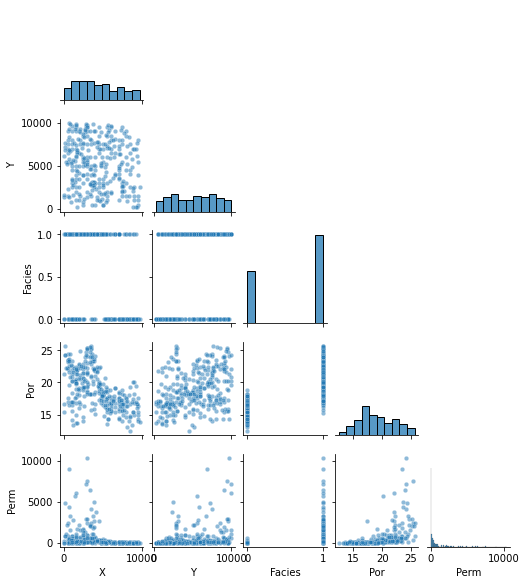

In [37]:
df_listwise = df_mask.dropna(how='any',inplace=False)

sns.pairplot(df_listwise.iloc[:,:-1], plot_kws={'alpha':0.5,'s':20},corner=True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.6, wspace=0.1, hspace=0.2)
# df_likewise.head(n = 13)

In [38]:
len(df_listwise)

298

#### Modeling Methods for Imputation

These are methods for feature imputation that treat feature imputation as a prediction problem, i.e., predict missing feature value with other available data, for example,

* the collocated other available feature values

* the same feature values available at other sample locations

There are many prediction methods applied for feature imputation,

* we start with the most simple prediction model possible, predicting with the global mean and proceed from there to more complicated models

To help us visualize the results, let's add a feature indicating if there are any missing feature values for a specific sample

* this way we can label the samples that have had features imputed for evaluation and visualization of the feature imputation results

In [39]:
df_mask['Imputed'] = (df_mask.isnull().sum(axis=1)) > 0
df_mask.head()

,X,Y,Facies,Por,Perm,AI,Imputed
0,502.929859,9008.972357,1,22.076146,140.021266,3.413064,False
1,508.696361,8505.744515,1,23.715447,NaN,3.074563,True
2,503.892888,8003.429847,1,23.435152,84.992437,2.292783,False
3,508.230145,7509.751406,1,24.455309,90.632307,2.494849,False
4,500.611637,7000.684230,1,23.178662,811.547979,2.522064,False


#### Imputation Method \#4 - Replace with a Constant

This is the method of replacing the missing values with a constant value.

* here's an example of replacing the missing feature values with a very low value

This results in bias and should not be done.

,X,Y,Facies,Por,Perm,AI,Imputed
0,502.929859,9008.972357,1,22.076146,140.021266,3.413064,False
1,508.696361,8505.744515,1,23.715447,0.010000,3.074563,True
2,503.892888,8003.429847,1,23.435152,84.992437,2.292783,False
3,508.230145,7509.751406,1,24.455309,90.632307,2.494849,False
4,500.611637,7000.684230,1,23.178662,811.547979,2.522064,False


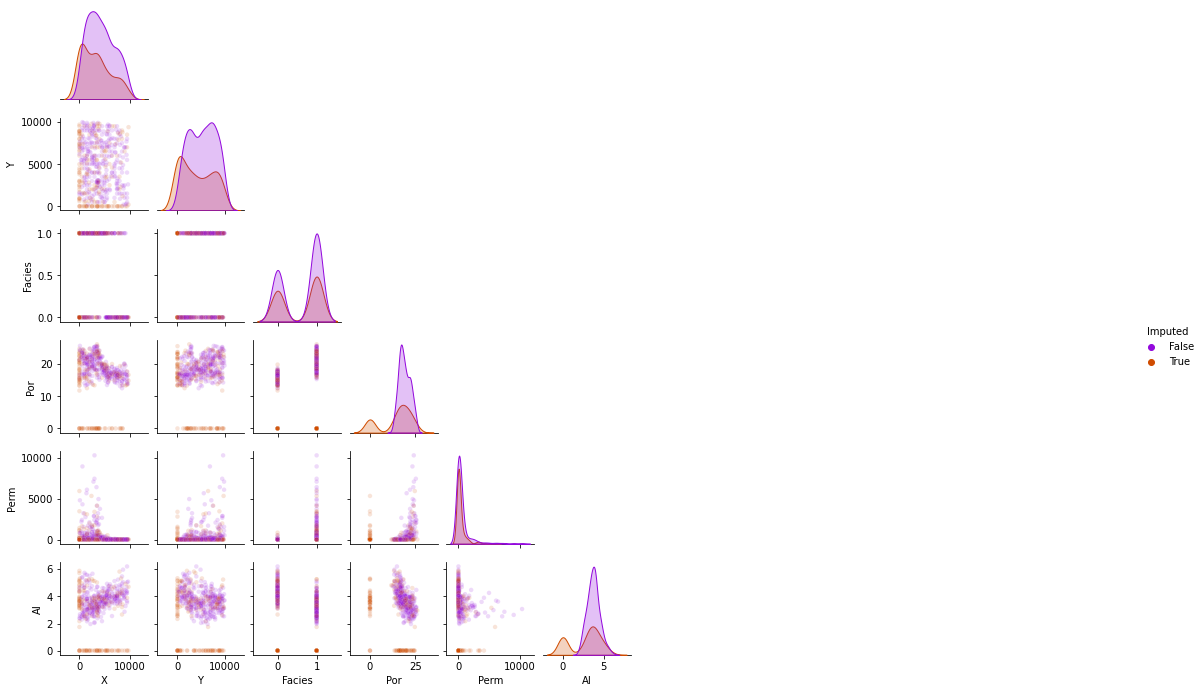

In [40]:
df_constant = df_mask.copy(deep=True)                         # make a deep copy of the DataFrame
constant_imputer = SimpleImputer(strategy='constant',fill_value = 0.01)
df_constant.iloc[:,:] = constant_imputer.fit_transform(df_constant)

sns.pairplot(df_constant.iloc[:,:], hue="Imputed", plot_kws={'alpha':0.15,'s':20}, palette = 'gnuplot', corner=True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.6, wspace=0.1, hspace=0.2)
df_constant.head(n=5)

#### Imputation Method \#6 - Replace with the Mean

This is the method of replacing the missing values with the mean, arithmetic average, over the feature. 

$$
𝑥_𝑖 = 𝐸\{𝑋_𝑖\}
$$

* the global mean is globally unbiased, but may result in local bias, i.e., low values are overestimated and high values are underestimated

,X,Y,Facies,Por,Perm,AI,Imputed
0,502.929859,9008.972357,1.0,22.076146,140.021266,3.413064,0.0
1,508.696361,8505.744515,1.0,23.715447,536.754984,3.074563,1.0
2,503.892888,8003.429847,1.0,23.435152,84.992437,2.292783,0.0
3,508.230145,7509.751406,1.0,24.455309,90.632307,2.494849,0.0
4,500.611637,7000.684230,1.0,23.178662,811.547979,2.522064,0.0


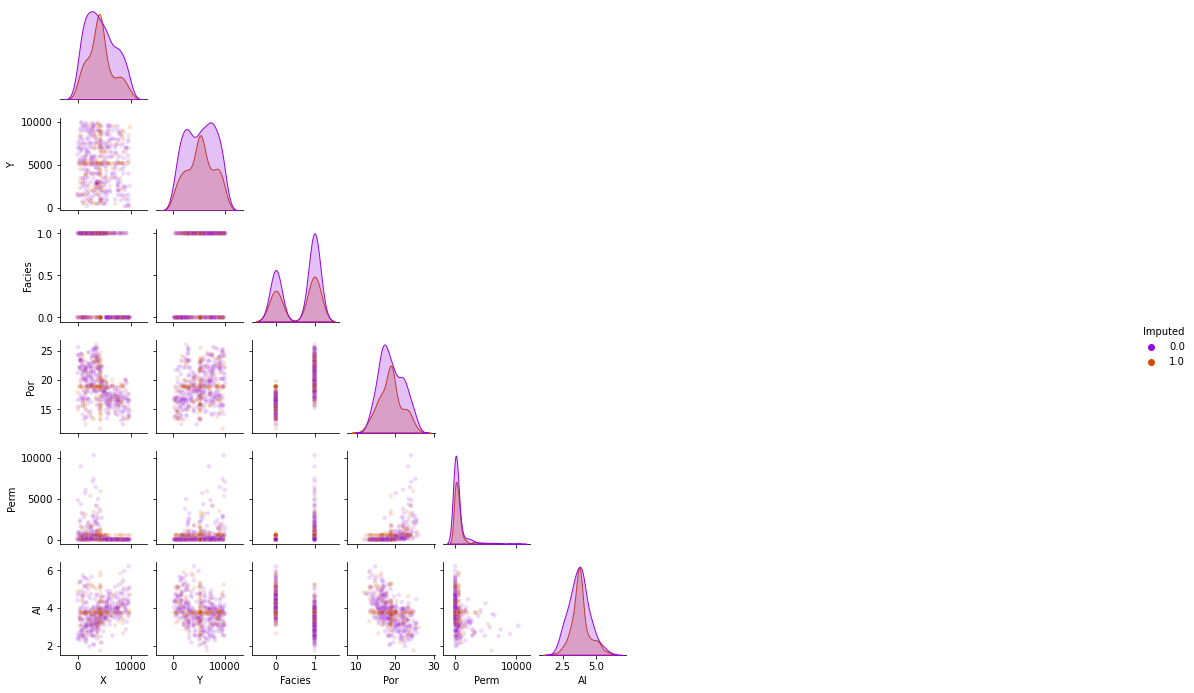

In [41]:
df_mean = df_mask.copy(deep=True)                         # make a deep copy of the DataFrame
mean_imputer = SimpleImputer(strategy='mean')
df_mean.iloc[:,:] = mean_imputer.fit_transform(df_mean)

sns.pairplot(df_mean.iloc[:,:], hue="Imputed", plot_kws={'alpha':0.15,'s':20}, palette = 'gnuplot', corner=True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.6, wspace=0.1, hspace=0.2)
df_constant.head(n=5)
df_mean.head(n=5)

#### Imputation Method \#6 - Replace with the Mode

This is the method of replacing the missing values with the most frequent value, mode, over the feature. 

* in the presence of outliers the mean may not be reliable. My recommendation is to first deal with outliers prior to feature imputation

,X,Y,Facies,Por,Perm,AI,Imputed
0,502.929859,9008.972357,1,22.076146,140.021266,3.413064,False
1,508.696361,8505.744515,1,23.715447,0.347182,3.074563,True
2,503.892888,8003.429847,1,23.435152,84.992437,2.292783,False
3,508.230145,7509.751406,1,24.455309,90.632307,2.494849,False
4,500.611637,7000.684230,1,23.178662,811.547979,2.522064,False


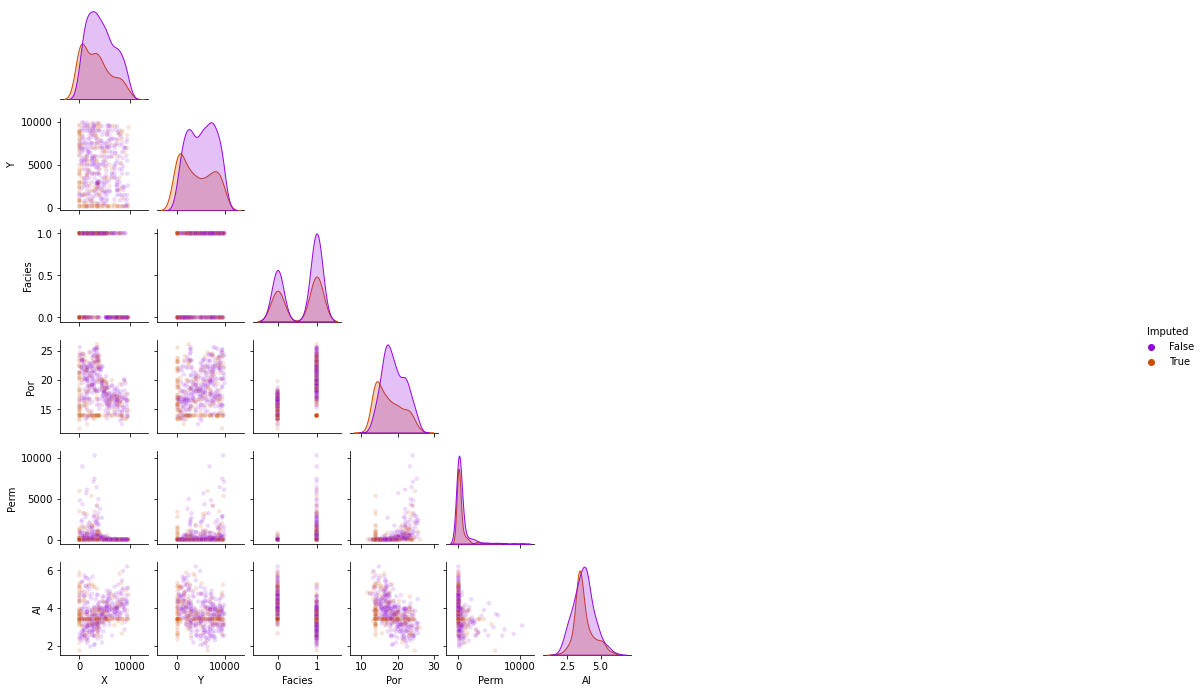

In [42]:
df_mode = df_mask.copy(deep=True)                         # make a deep copy of the DataFrame
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode.iloc[:,:] = mode_imputer.fit_transform(df_mode)

sns.pairplot(df_mode.iloc[:,:], hue="Imputed", plot_kws={'alpha':0.15,'s':20}, palette = 'gnuplot', corner=True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.6, wspace=0.1, hspace=0.2)
df_constant.head(n=5)
df_mode.head(n=5)

#### Imputation Method \#7 - Replace with the n-nearest Neighbor estimation

This is the method of replacing the missing values with the k-nearest neighbour prediction model based on the other available collocated feature values

* see the k-nearest neighbour chapter in this e-book for explanation of the method, assumptions and hyperparameters 

* the available data is applied to predict at the missing values in features space

Since the k-nearest neighbor method is a lazy learner, imputed values are calculated in a single pass over the missing values

* there is not a separate train and predict step

This method should be globally unbiased and will reduce local bias relative to global mean feature imputation

,X,Y,Facies,Por,Perm,AI,Imputed
0,502.929859,9008.972357,1,22.076146,140.021266,3.413064,False
1,508.696361,8505.744515,1,23.715447,0.347182,3.074563,True
2,503.892888,8003.429847,1,23.435152,84.992437,2.292783,False
3,508.230145,7509.751406,1,24.455309,90.632307,2.494849,False
4,500.611637,7000.684230,1,23.178662,811.547979,2.522064,False


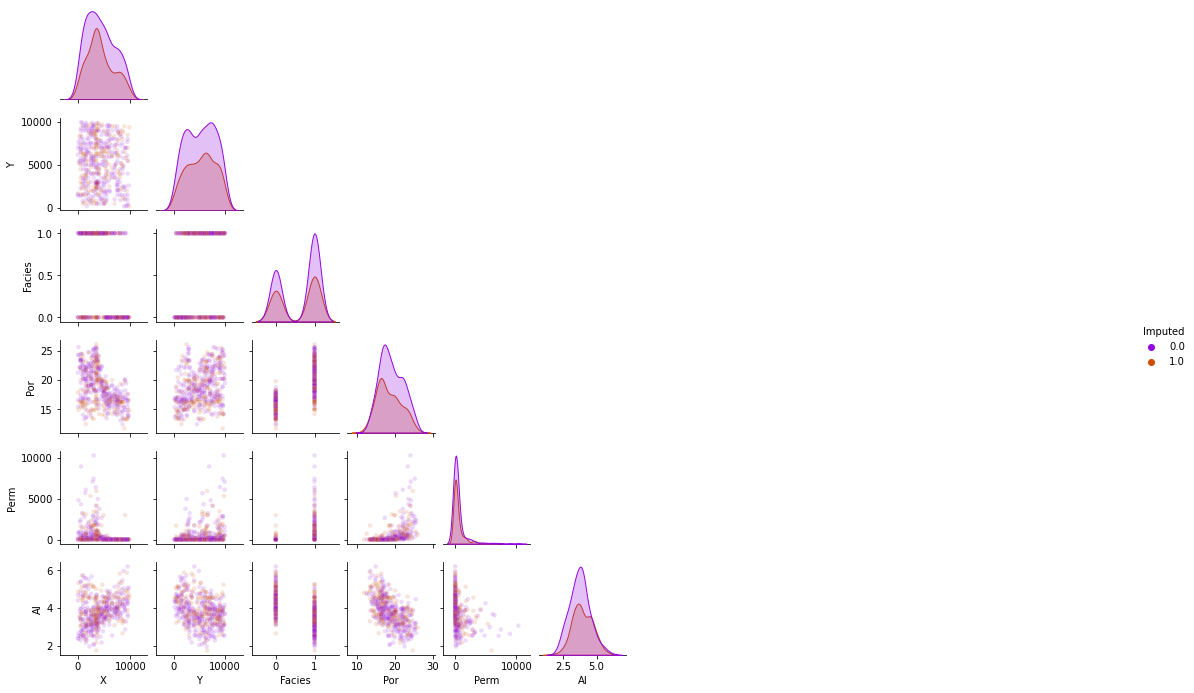

In [43]:
df_knn = df_mask.copy(deep=True)                         # make a deep copy of the DataFrame
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_knn.iloc[:,:] = knn_imputer.fit_transform(df_knn)

sns.pairplot(df_knn.iloc[:,:], hue="Imputed", plot_kws={'alpha':0.15,'s':20}, palette = 'gnuplot', corner=True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.6, wspace=0.1, hspace=0.2)
df_constant.head(n=5)
df_mode.head(n=5)

#### Imputation Method \#8 - Multiple imputation by chained equations 

This is the method of replacing the missing values with the k-nearest neighbour prediction model

1. Substitute random values from $𝐹_{𝑋_{𝑖=1,\ldots,𝑚}}(𝑋_{𝑖=1,\ldots,𝑚})$ for missing values
   
2. Sequentially predict missing values for a feature with others

3. Iterative until convergence criteria, usually multivariate statistics

4. Repeat for multiple realizations of the dataset

The default predictor is BayesianRidge().

* we can specify the maximum number of iterations. The last computed imputations are returned.


,X,Y,Facies,Por,Perm,AI,Imputed
0,502.929859,9008.972357,1,22.076146,140.021266,3.413064,False
1,508.696361,8505.744515,1,23.715447,0.347182,3.074563,True
2,503.892888,8003.429847,1,23.435152,84.992437,2.292783,False
3,508.230145,7509.751406,1,24.455309,90.632307,2.494849,False
4,500.611637,7000.684230,1,23.178662,811.547979,2.522064,False


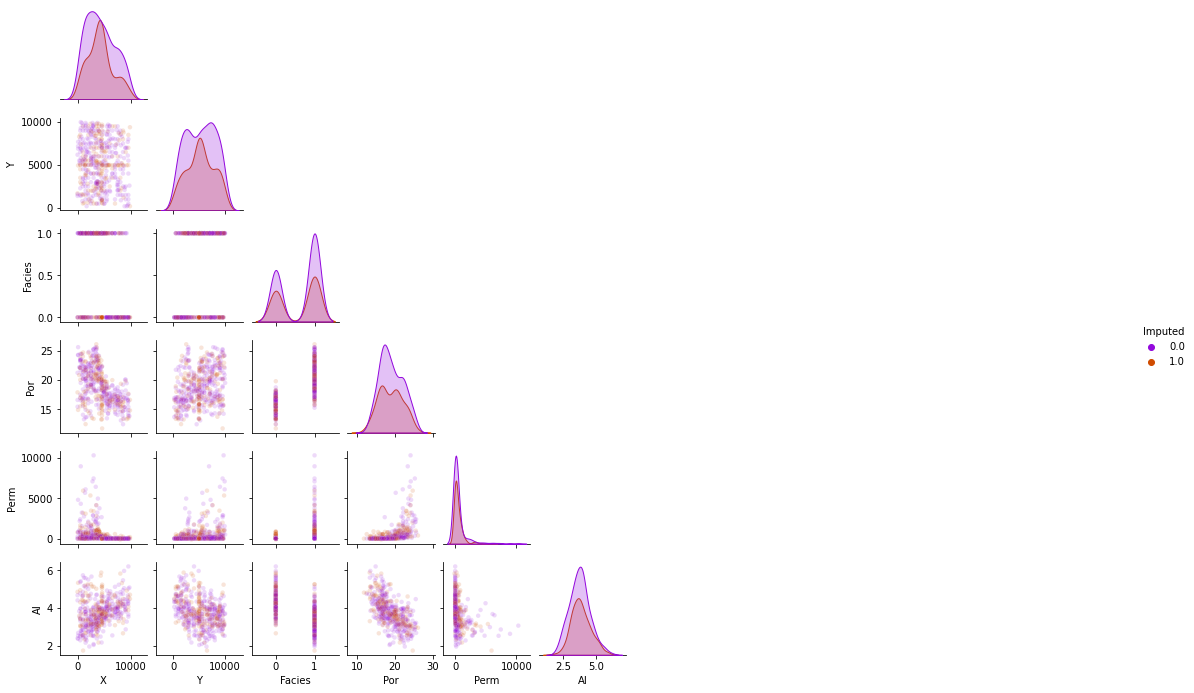

In [44]:
df_mice = df_mask.copy(deep=True)                         # make a deep copy of the DataFrame
mice_imputer = IterativeImputer()
df_mice.iloc[:,:] = mice_imputer.fit_transform(df_mice)

sns.pairplot(df_mice.iloc[:,:], hue="Imputed", plot_kws={'alpha':0.15,'s':20}, palette = 'gnuplot', corner=True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.5, top=0.6, wspace=0.1, hspace=0.2)
df_constant.head(n=5)
df_mode.head(n=5)

#### Save the Imputed DataFrame

Write out the imputed data file.

In [ ]:
save_imputed = False                                          # save the imputed DataFrame?

if save_imputed == True:
    df_imputed = df_knn.copy(deep = True)                     # select the imputation method

    df_imputed.drop('Imputed',axis=1,inplace=True) 
    folder = r'C:\Local'
    file_name = r'dataframe_imputed.csv'

    df_imputed.to_csv(file_name, index=False)

#### Comments

This was a basic treatment of feature imputation. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).
#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
